# auto_encoder_pyOD

# Установка библиотеки

In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.1-py3-none-any.whl size=190074 sha256=965f492823276cbb1b2e515d28cbe97372f6f46bbc99ef3aa48f9928587b30bc
  Stored in directory: /root/.cache/pip/wheels/a3/42/d7/48a53ffc1466bd63932f28583c64ebf442114db14a0bfa8c95
Successfully built pyod


In [2]:
cd ./drive/MyDrive/InControl/

/content/drive/MyDrive/InControl


## Загрузка и подготовка данных

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/InControl/Train_LSTM-master/YUGRES10/clear_data/clear_data.csv')
time_ = pd.to_datetime(df['timestamp'])

In [4]:
import pandas as pd

# Предположим, что у вас есть DataFrame df

# Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in df.columns if col.startswith("20")]

# Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected = df[selected_columns]
df_selected.index = time_

In [5]:
# Заполнение пропущенных значений
df_selected.fillna(method='ffill', inplace=True)

# Масштабирование данных (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected)

<ipython-input-5-16af7d2f47de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(method='ffill', inplace=True)


In [6]:
from pyod.models.alad import ALAD
clf_name = 'ALAD'
clf = ALAD()
clf.fit(scaled_data)

# get outlier scores
y_train_scores = clf.decision_scores_ # raw outlier scores on the train data
# y_test_scores = clf.decision_function(df)  # predict raw outlier scores on test
y_train_pred = clf.labels_
print(y_train_scores)
print(y_train_pred)

[1.2647375 1.2683599 1.2680925 ... 1.9048742 1.9031417 1.9022547]
[0 0 0 ... 1 1 0]


In [7]:
from joblib import dump, load

# save the model
dump(clf, 'clf_alad.joblib')
# load the model
clf = load('clf_alad.joblib')

AttributeError: ignored

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os
import numpy as np

# cnx = sqlite3.connect('YUGRES_all.sqlite')
# print(cnx.cursor)
# test_df = pd.read_sql_query("SELECT * FROM 'data'", cnx, parse_dates=True,index_col = 'timestamp')
test_df = pd.read_csv('data.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)
test_df = test_df[test_df['20MBY10CE901_XQ01']>195]
# time_ = pd.to_datetime(test_df['timestamp'])
# # Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in test_df.columns if col.startswith("20")]
# # Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected_test = test_df[selected_columns]
# df_selected_test.index = time_

<ipython-input-8-4e1f92c1e301>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df = pd.read_csv('data.csv', index_col = 'timestamp', parse_dates=True, squeeze=True)


In [31]:
df_selected_test.fillna(method='ffill', inplace=True)

# Масштабирование данных (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected_test)
print(df_selected_test)

<ipython-input-31-ca68512d5a8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.fillna(method='ffill', inplace=True)


                     20MBY10CE901_XQ01  20MBY00CS901_XQ01  20MBL11CT010_XQ01  \
timestamp                                                                      
2017-01-01 00:00:00         406.039490          45.331322          -3.378902   
2017-01-01 00:05:00         406.039490          45.331322          -3.378902   
2017-01-01 00:10:00         406.039490          45.331322          -3.406754   
2017-01-01 00:15:00         406.039490          45.331322          -3.406754   
2017-01-01 00:20:00         405.801483          45.331322          -3.406754   
...                                ...                ...                ...   
2019-07-23 20:40:00         388.705505          50.043404          15.766060   
2019-07-23 20:45:00         388.545990          50.000004          15.766060   
2019-07-23 20:50:00         388.191528          50.021706          15.766060   
2019-07-23 20:55:00         389.059967          50.045574          15.690468   
2019-07-23 21:00:00         389.059967  

In [58]:
# from pyod.models.alad import ALAD
# clf_name = 'ALAD'
# clf = ALAD()
y_test_scores = clf.get_outlier_scores(scaled_data)
# print()

# get outlier scores
# y_test_scores = clf.decision_scores_ # raw outlier scores on the train data
# # y_test_scores = clf.decision_function(df)  # predict raw outlier scores on test
# y_test_pred = clf.labels_
print(y_test_scores)
print(len(y_test_scores))
# print(y_test_pred)

[1.7521098 1.7485874 1.7528923 ... 1.8701525 1.8668592 1.864892 ]
204186


In [59]:
y_test_scores[:5]

array([1.7521098, 1.7485874, 1.7528923, 1.7624733, 1.7516472],
      dtype=float32)

In [60]:
import scipy
def scaler_loss(target_value, scaler_name, range_loss = 100):
            if scaler_name == 'cdf':
                hist = np.histogram(target_value, bins=range_loss)
                # logger.debug(target_value)
                scaler_loss = scipy.stats.rv_histogram(hist)
                # logger.debug(hist)
                target_value = scaler_loss.cdf(target_value)*range_loss
                scaler_loss = hist
            elif scaler_name == 'minmax':
                scaler_loss = MinMaxScaler(feature_range=(0, range_loss))
                loss_2d = np.reshape(target_value, (-1,1))
                scaler_loss.fit(loss_2d)
                target_value = scaler_loss.transform(loss_2d)
            return target_value, scaler_loss

In [45]:
loss = scaler_loss(y_test_scores,'cdf')

In [61]:
df_loss = pd.DataFrame()
df_loss['loss'] = y_test_scores
print(df_loss)
target_value, scaler_loss = scaler_loss(df_loss['loss'],'cdf')
print(target_value)



            loss
0       1.752110
1       1.748587
2       1.752892
3       1.762473
4       1.751647
...          ...
204181  1.869518
204182  1.871006
204183  1.870152
204184  1.866859
204185  1.864892

[204186 rows x 1 columns]
[13.59165409 13.12649261 13.69498833 ... 78.49901402 76.78119493
 75.75508002]


<ipython-input-60-6d3f32a568b6>:6: RuntimeWarning: Bin widths are not constant. Assuming `density=True`.Specify `density` explicitly to silence this warning.
  scaler_loss = scipy.stats.rv_histogram(hist)


In [62]:
df_target = pd.DataFrame()
df_target['target_value'] = target_value
df_target.index = df_selected_test.index
print(df_target)
df_target.to_csv('pyOD_ALAD.csv')

                     target_value
timestamp                        
2017-01-01 00:00:00     13.591654
2017-01-01 00:05:00     13.126493
2017-01-01 00:10:00     13.694988
2017-01-01 00:15:00     15.103405
2017-01-01 00:20:00     13.530573
...                           ...
2019-07-23 20:40:00     78.168023
2019-07-23 20:45:00     78.944045
2019-07-23 20:50:00     78.499014
2019-07-23 20:55:00     76.781195
2019-07-23 21:00:00     75.755080

[204186 rows x 1 columns]


In [63]:
df = pd.read_csv('pyOD_ALAD.csv')

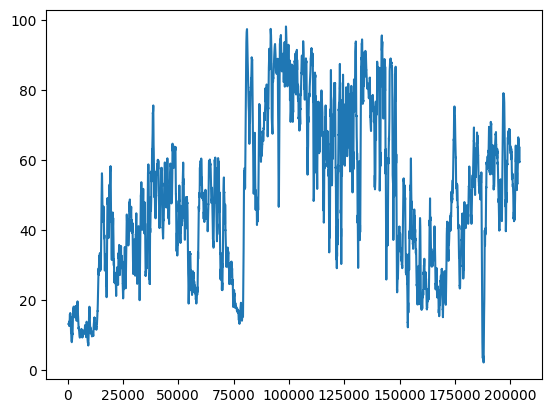

In [64]:
window_size = 512
df['target_mean'] = df['target_value'].rolling(window=window_size).mean()
plt.plot(df['target_mean'])

In [65]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [66]:
import pandas as pd

data_to_remove = {
    'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00', '2017-12-22 00:00:00',
               '2017-12-22 00:00:00', '2017-03-05 00:00:00', '2017-03-03 00:00:00',
               '2017-12-22 18:10:00', '2019-05-25 01:10:00', '2017-07-06 00:00:00',
               '2019-05-26 00:00:00', '2017-03-03 00:00:00'],
    'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00', '2018-02-19 00:00:00',
             '2017-12-22 23:55:00', '2017-03-05 23:55:00', '2017-03-03 23:55:00',
             '2018-02-20 20:55:00', '2019-05-28 14:45:00', '2017-07-06 23:55:00',
             '2019-05-26 23:55:00', '2017-03-03 23:55:00']
}

# Преобразуем даты в формат Timestamp
date_tuples = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in zip(data_to_remove['Начало'], data_to_remove['Конец'])]

print(date_tuples)

[(Timestamp('2017-01-13 16:05:00'), Timestamp('2017-01-21 08:50:00')), (Timestamp('2017-01-24 13:35:00'), Timestamp('2017-02-06 05:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2018-02-19 00:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-22 23:55:00')), (Timestamp('2017-03-05 00:00:00'), Timestamp('2017-03-05 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00')), (Timestamp('2017-12-22 18:10:00'), Timestamp('2018-02-20 20:55:00')), (Timestamp('2019-05-25 01:10:00'), Timestamp('2019-05-28 14:45:00')), (Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-06 23:55:00')), (Timestamp('2019-05-26 00:00:00'), Timestamp('2019-05-26 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00'))]


In [67]:
import numpy as np
import pandas as pd

# Замените 'df' на вашу собственную переменную DataFrame
# и 'timestamp' на имя столбца с временными метками,
# 'value' на имя столбца со значениями

# Рассчитываем порог
short_threshold = 85

# Создаем список, чтобы хранить интервалы
intervals = []

# Инициализируем переменные для текущего интервала
current_interval_start = None
current_interval_end = None

# Проходимся по всем строкам DataFrame
for index, row in df.iterrows():
    timestamp = row['timestamp']  # Предполагается, что столбец 'timestamp' содержит временные метки
    # Если значение выше порога, начинаем новый интервал
    if row['target_mean'] > short_threshold:
        if current_interval_start is None:
            current_interval_start = timestamp
        current_interval_end = timestamp
    else:
        # Если значение ниже порога, закрываем текущий интервал
        if current_interval_start is not None:
            # Проверяем длительность интервала
            if current_interval_end - current_interval_start > pd.Timedelta(seconds=600):
                intervals.append((current_interval_start, current_interval_end))
            # Сбрасываем переменные текущего интервала
            current_interval_start = None
            current_interval_end = None

# Проверяем последний интервал после завершения цикла
if current_interval_start is not None:
    if current_interval_end - current_interval_start > pd.Timedelta(seconds=600):
        intervals.append((current_interval_start, current_interval_end))


                 timestamp  target_value  target_mean
80655  2017-12-29 04:15:00     94.914499    85.026262
80656  2017-12-29 04:20:00     95.787139    85.107500
80657  2017-12-29 04:25:00     96.117012    85.189623
80658  2017-12-29 04:30:00     95.550031    85.274452
80659  2017-12-29 04:35:00     94.156624    85.348613
...                    ...           ...          ...
148227 2018-10-31 16:15:00      6.578662    85.839145
148228 2018-10-31 16:20:00      5.539393    85.667868
148229 2018-10-31 16:25:00      4.918931    85.485796
148230 2018-10-31 16:30:00      2.769191    85.305348
148231 2018-10-31 16:35:00      2.725765    85.119603

[16064 rows x 3 columns]
                timestamp  target_value  target_mean
2772  2017-01-13 16:05:00     14.883414    17.945846
2773  2017-01-13 16:10:00     15.252407    17.970277
2774  2017-01-13 16:15:00     13.451577    17.988025
2775  2017-01-13 16:20:00     13.937358    18.005909
2776  2017-01-13 16:25:00     13.590788    18.021985
...     

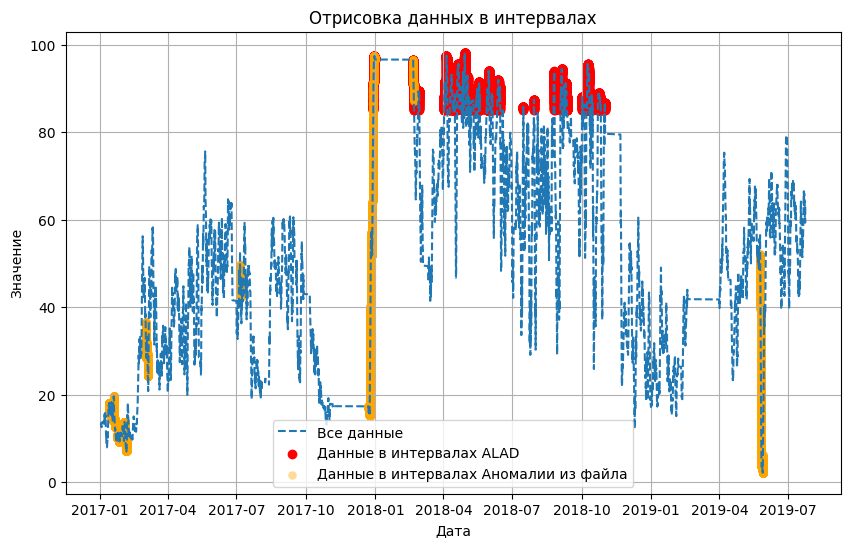

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


df['timestamp'] = pd.to_datetime(df['timestamp'])
# Определите интервалы
intervals = intervals
intervals_an = date_tuples

# Фильтруем DataFrame, чтобы получить только строки, которые находятся в интервалах
filtered_df = pd.DataFrame()
filtered_df_an = pd.DataFrame()

for interval in intervals:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df = pd.concat([filtered_df, interval_df])
print(filtered_df)
for interval in intervals_an:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df_an = pd.concat([filtered_df_an, interval_df])
print(filtered_df_an)

# Отрисовываем полученные данные
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['target_mean'], label='Все данные', linestyle='--')
plt.scatter(filtered_df['timestamp'], filtered_df['target_mean'], color='red', label='Данные в интервалах ALAD')
plt.scatter(filtered_df_an['timestamp'], filtered_df_an['target_mean'], color='orange', label='Данные в интервалах Аномалии из файла', alpha = 0.4,linewidths=0.1)
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.title('Отрисовка данных в интервалах')
plt.grid(True)
plt.show()

In [69]:
import json
from datetime import datetime


# Преобразование интервалов в список словарей
interval_dicts = []

for start, end in intervals:
    interval_dict = {
        "start": str(start),
        "end": str(end),
        "duration_hours": (end - start).total_seconds() / 3600
    }
    interval_dicts.append(interval_dict)

# Преобразование в JSON
json_data = json.dumps(interval_dicts, indent=4)

# Сохранение JSON в файл
with open("intervals_ALAD.json", "w") as json_file:
    json_file.write(json_data)